# **DATA EXPLORATION AND VISUALIZATION**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv("heart.csv")


In [3]:
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [4]:
print("\nDataset Description:")
print(data.describe())


Dataset Description:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [5]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#data types
data_types=data.dtypes
print(data_types)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [8]:
#to check the format
def has_whitespace(element):
  return any(char.isspace() for char in element)
for element in data:
  if has_whitespace(element):
    print(f"Element '{element}' contains white space.")
  else:
    print(f"Element '{element}' does not contain white space.")

Element 'Age' does not contain white space.
Element 'Sex' does not contain white space.
Element 'ChestPainType' does not contain white space.
Element 'RestingBP' does not contain white space.
Element 'Cholesterol' does not contain white space.
Element 'FastingBS' does not contain white space.
Element 'RestingECG' does not contain white space.
Element 'MaxHR' does not contain white space.
Element 'ExerciseAngina' does not contain white space.
Element 'Oldpeak' does not contain white space.
Element 'ST_Slope' does not contain white space.
Element 'HeartDisease' does not contain white space.


In [9]:
# #filling missing values with mean (if numeric) or mode (if categorical)
# imputer = SimpleImputer(strategy="mean")
# data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])),
#                             columns=data.select_dtypes(include=[np.number]).columns)


In [10]:
# Print the number of rows in a DataFrame
print("Number of rows in the DataFrame:", data.shape[0])

Number of rows in the DataFrame: 918


In [11]:
# Check for missing values
if data.isnull().sum().sum() == 0:
    print("Nothing to impute. The data has no missing values.")
else:
    # Numeric imputer (mean)
    numeric_imputer = SimpleImputer(strategy="mean")
    numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(data.select_dtypes(include=[np.number])),
                                    columns=data.select_dtypes(include=[np.number]).columns)

    # Categorical imputer (mode)
    categorical_imputer = SimpleImputer(strategy="most_frequent")
    categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(data.select_dtypes(exclude=[np.number])),
                                       columns=data.select_dtypes(exclude=[np.number]).columns)

    # Print the number of rows in the numeric_imputed DataFrame
    print("Number of rows in numeric_imputed:", numeric_imputed.shape[0])

    # Print the number of rows in the categorical_imputed DataFrame
    print("Number of rows in categorical_imputed:", categorical_imputed.shape[0])

    # Optional: Combine the imputed DataFrames if needed
    imputed_data = pd.concat([numeric_imputed, categorical_imputed], axis=1)

    # Optional: Sort columns to match the original DataFrame
    imputed_data = imputed_data[data.columns]

    # Display the combined imputed DataFrame
    print(imputed_data)

Nothing to impute. The data has no missing values.


In [12]:
from sklearn.preprocessing import LabelEncoder
categorical_data = pd.DataFrame(data.select_dtypes(exclude=[np.number]))
numeric_data = pd.DataFrame(data.select_dtypes(include=[np.number]))


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
categorical_data["Sex"] = label_encoder.fit_transform(categorical_data["Sex"])
categorical_data["ChestPainType"] = label_encoder.fit_transform(categorical_data["ChestPainType"])
categorical_data["RestingECG"] = label_encoder.fit_transform(categorical_data["RestingECG"])
categorical_data["ExerciseAngina"] = label_encoder.fit_transform(categorical_data["ExerciseAngina"])
categorical_data["ST_Slope"] = label_encoder.fit_transform(categorical_data["ST_Slope"])

In [13]:
data_imputed = pd.concat([numeric_data, categorical_data.reset_index(drop=True)], axis=1)

In [14]:
print("Number of rows :", data_imputed.shape[0])


Number of rows : 918


In [15]:
X = data_imputed.drop(columns=['HeartDisease'])  # Features
y = data_imputed['HeartDisease']  # Target variable



In [16]:
# Standardize the features
scaler = StandardScaler()
data_scaled_features = scaler.fit_transform(X)  # Scale the features

In [17]:
data_scaled_df = pd.DataFrame(data_scaled_features, columns=X.columns)

In [18]:
data_scaled_df['HeartDisease'] = y.reset_index(drop=True)

In [19]:
print("\nScaled DataFrame (First 5 Rows):")
print(data_scaled_df.head())


Scaled DataFrame (First 5 Rows):
        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak       Sex  \
0 -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432  0.515952   
1 -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664 -1.938163   
2 -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432  0.515952   
3 -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711 -1.938163   
4  0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432  0.515952   

   ChestPainType  RestingECG  ExerciseAngina  ST_Slope  HeartDisease  
0       0.229032    0.017255       -0.823556  1.052114             0  
1       1.275059    0.017255       -0.823556 -0.596078             1  
2       0.229032    1.601219       -0.823556  1.052114             0  
3      -0.816995    0.017255        1.214246 -0.596078             1  
4       1.275059    0.017255       -0.823556  1.052114             0  


In [20]:
# Define the target column
target_column = "HeartDisease"  # Replace with the actual name of your target variable

# Extract the target variable
y = data_imputed[target_column]  # Ensure `data_imputed` contains the target column
  # Exclude target column


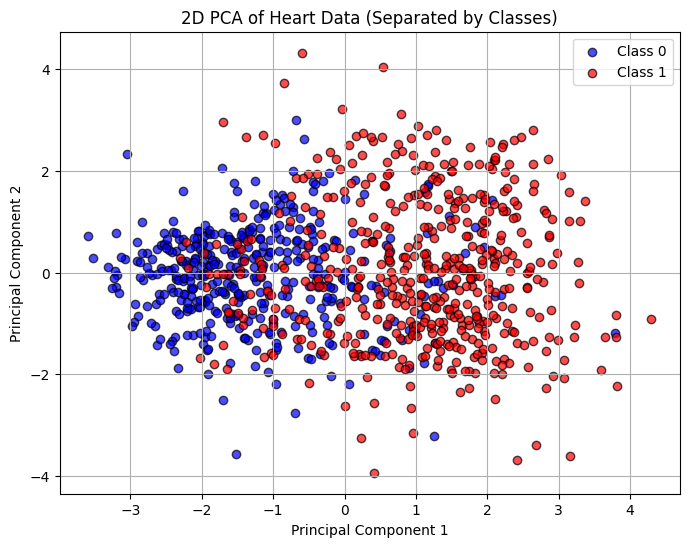

In [21]:
target_column = "HeartDisease"
X = data_scaled_df[target_column]
Y = data_scaled_df.drop(target_column, axis=1)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(Y)
data_pca_df = pd.DataFrame(data_pca, columns=["PC1", "PC2"])
data_pca_df["HeartDisease"] = X.values


plt.figure(figsize=(8, 6))
colors = {0: "blue", 1: "red"}  # Define colors for the classes
for label, color in colors.items():
    subset = data_pca_df[data_pca_df["HeartDisease"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], alpha=0.7, edgecolor="k", label=f"Class {label}", color=color)

plt.title("2D PCA of Heart Data (Separated by Classes)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

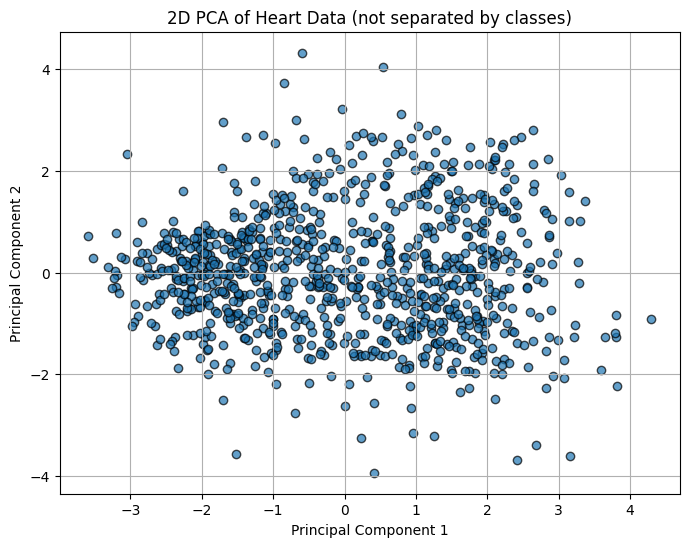

In [22]:
#another visulaization for pca but not separated
plt.figure(figsize=(8, 6))
plt.scatter(data_pca_df["PC1"], data_pca_df["PC2"], alpha=0.7, edgecolor='k')
plt.title("2D PCA of Heart Data (not separated by classes)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

In [23]:
#commenting on the results
print("Variance Ratio by PCA components:")
print(pca.explained_variance_ratio_)

Variance Ratio by PCA components:
[0.25139665 0.1330889 ]


# **DATA CLEANING AND PROCESSING**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
print("\nMissing Values After Imputation done above:")
print(data_imputed.isnull().sum())



Missing Values After Imputation done above:
Age               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
Oldpeak           0
HeartDisease      0
Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64


 **Dealing with Outliers**

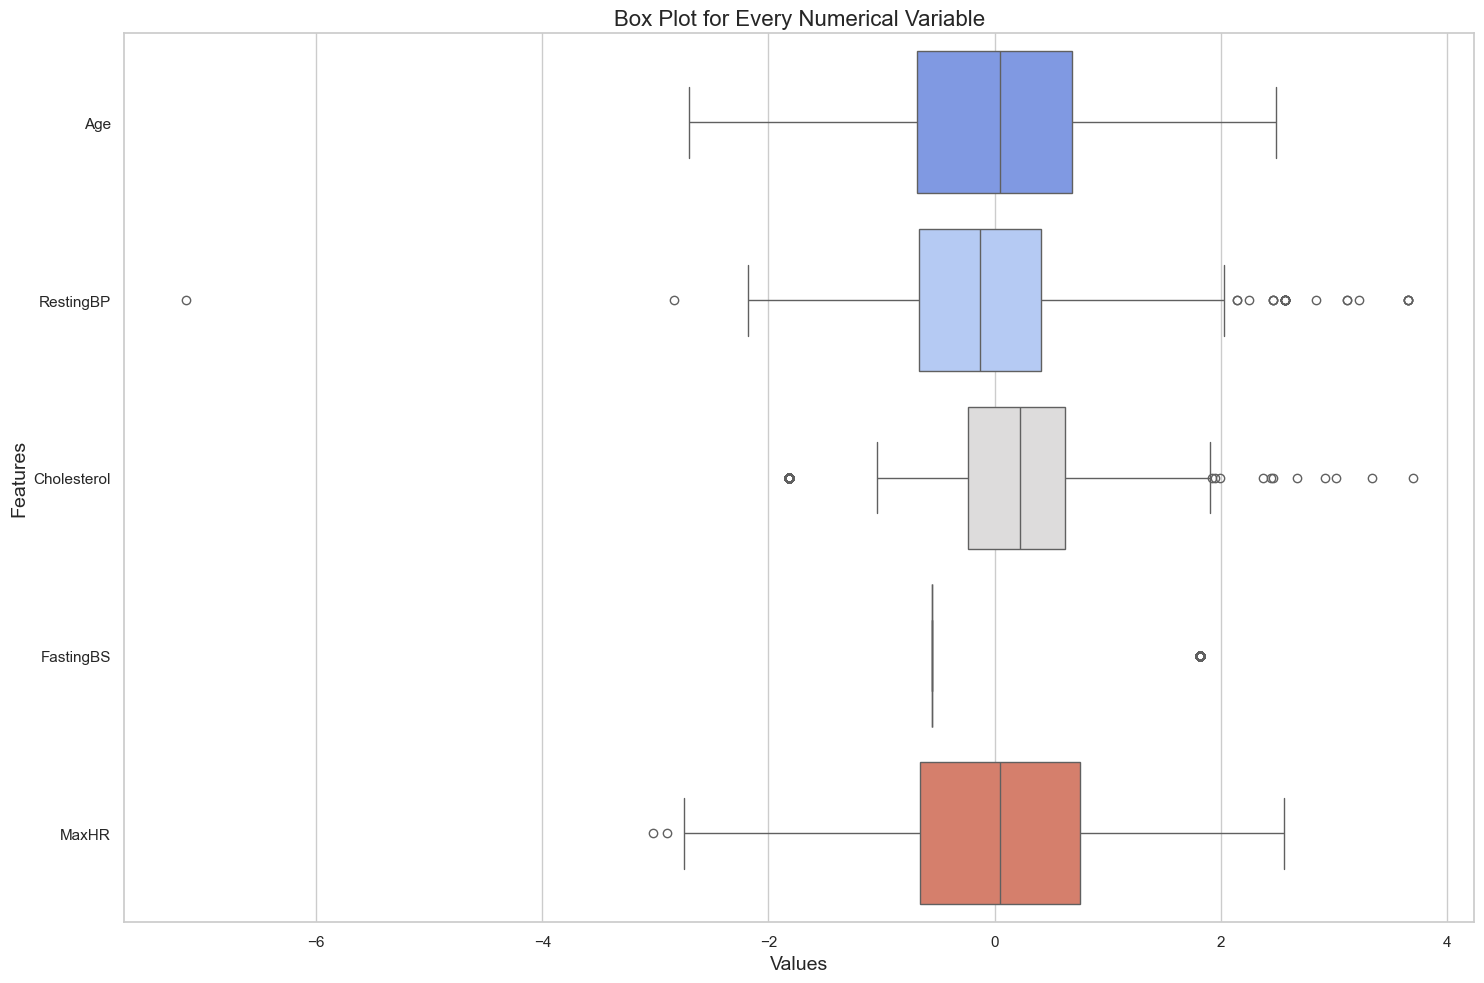

(918, 5)


In [26]:
# Filter for numerical columns only
data_numeric = data_scaled_df.iloc[:, 0:5]

# Set up the aesthetics for the plot
sns.set(style="whitegrid")

# Create a color palette based on the number of numerical columns
palette = sns.color_palette("coolwarm", len(data_numeric.columns))

# Create the box plots for every numerical variable
plt.figure(figsize=(15, 10))

# Plotting
sns.boxplot(data=data_numeric, orient="h", palette=palette)
plt.title("Box Plot for Every Numerical Variable", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Features", fontsize=14)


plt.tight_layout()
plt.show()

print(data_numeric.shape)

In [27]:
print(data_numeric.dtypes)


Age            float64
RestingBP      float64
Cholesterol    float64
FastingBS      float64
MaxHR          float64
dtype: object


In [28]:


# Calculate the Z-scores
z_scores = (data_numeric - data_numeric.mean()) / data_numeric.std()

# Define the threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Create a boolean mask for outliers (any value greater than the threshold)
outlier_mask = np.abs(z_scores) > threshold

# Select the rows where at least one value is an outlier
outliers = data_numeric[outlier_mask.any(axis=1)]

# Print the shape and the outliers
print(f"Number of outliers detected using Z-score: {len(outliers)}")
print("Outliers detected:")
print(outliers)

# To remove the outlier rows from the original DataFrame, use the index of outliers
outlier_indices = outliers.index
data_no_outliers = data_scaled_df.drop(index=outlier_indices)

# Print the shape of the DataFrame after removing outliers
print(f"Shape of DataFrame after removing outliers: {data_no_outliers.shape}")


Number of outliers detected using Z-score: 12
Outliers detected:
          Age  RestingBP  Cholesterol  FastingBS     MaxHR
76  -2.281723  -0.778019     3.020369  -0.551341 -0.267596
109 -1.539213   3.113018     0.386011  -0.551341 -1.210752
149  0.051881  -0.129513     3.697252   1.813758 -0.464087
241  0.051881   3.653439    -0.007314  -0.551341  0.203982
365  1.112610   3.653439    -1.818435  -0.551341  0.125386
390 -0.266338   0.410909    -1.818435  -0.551341 -3.018469
399  0.794391   3.653439    -1.818435   1.813758 -2.625487
449  0.157954  -7.154995    -1.818435  -0.551341  0.714859
592  0.794391   3.113018     0.806776   1.813758  0.518368
616  1.430829  -0.940145     3.340516  -0.551341  0.911350
732  0.264027   3.653439     0.815923   1.813758 -0.149701
759  0.051881   3.221102     0.770188  -0.551341  2.286787
Shape of DataFrame after removing outliers: (906, 12)


In [29]:
# #another approach for outliers, also with IQR, but this counts individual outlier values across all columns
# #the first approach is more row-based (it counts rows with any outlier).
# Q1 = data_numeric.quantile(0.25)
# Q3 = data_numeric.quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data_no_outliers = data_numeric[~((data_numeric < lower_bound) | (data_numeric > upper_bound)).any(axis=1)]

# print(f"Data After Removing Outliers: {data_no_outliers.shape}")


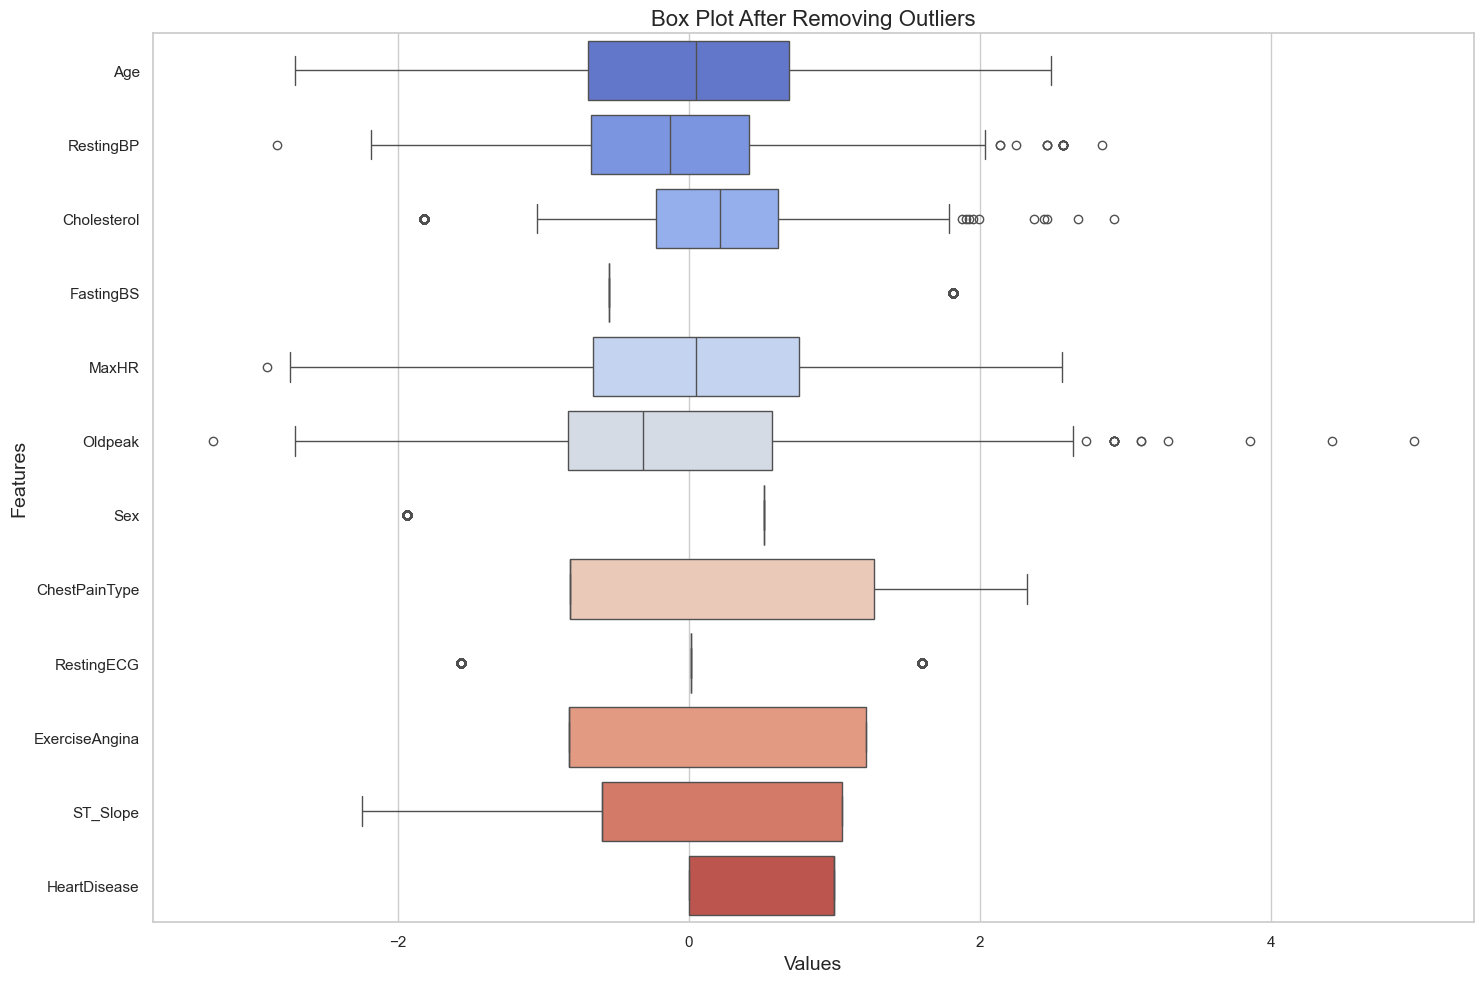

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_no_outliers, orient="h", palette="coolwarm")

plt.title("Box Plot After Removing Outliers", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Features", fontsize=14)


plt.tight_layout()
plt.show()

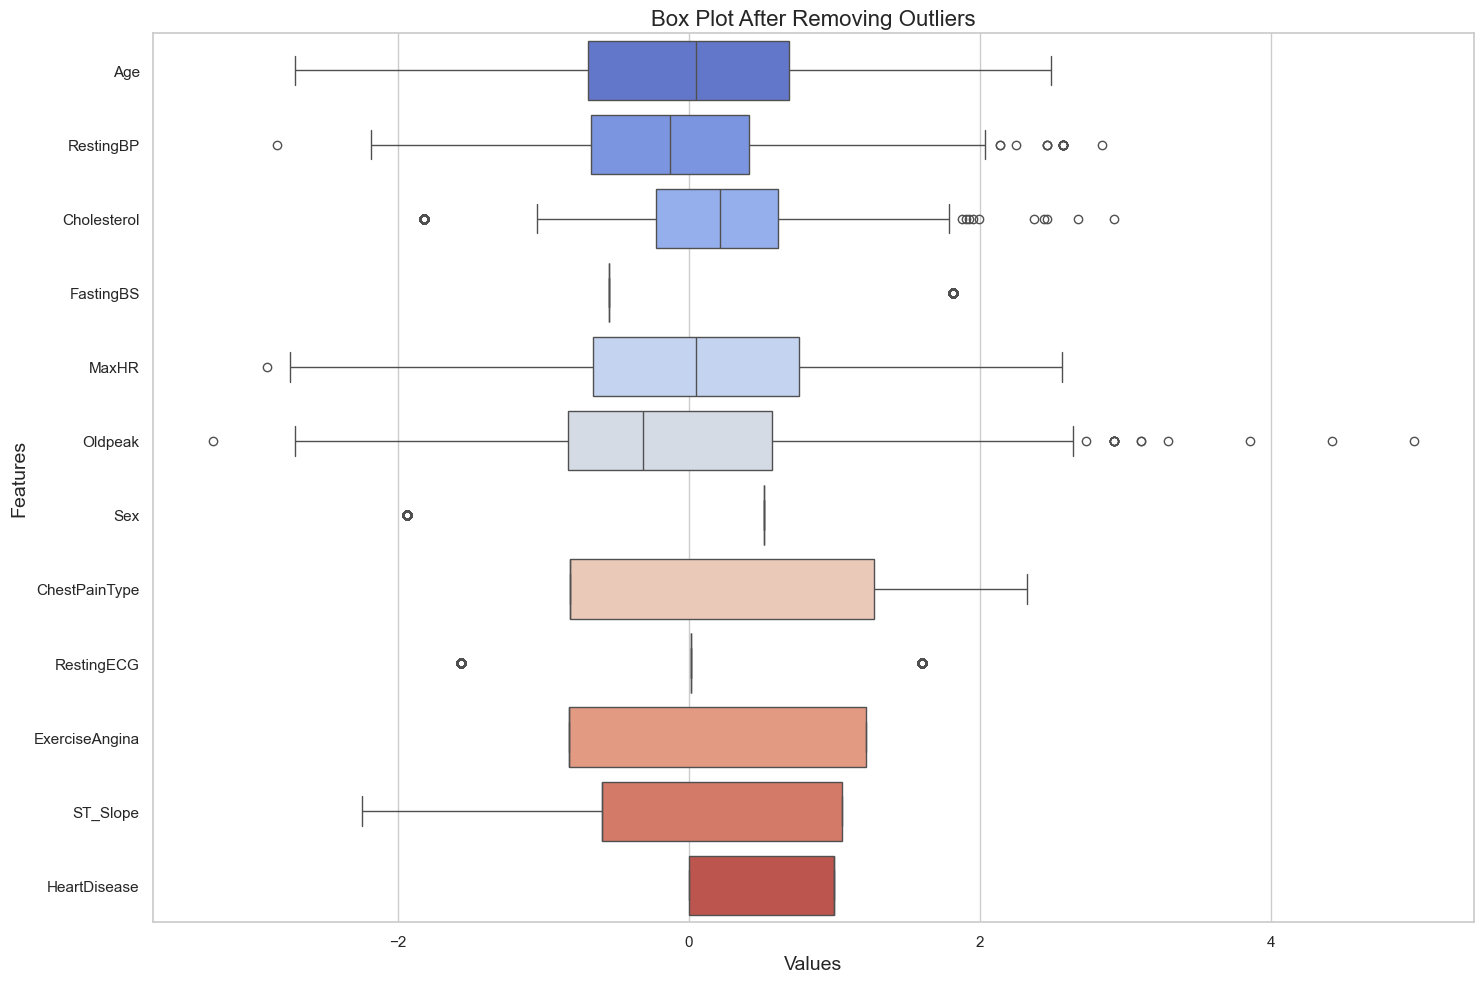

In [31]:
# Plotting
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_no_outliers, orient="h", palette="coolwarm")
plt.title("Box Plot After Removing Outliers", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()


 **Removing Duplicates**

In [32]:
# Count the number of duplicate rows
duplicate_count = data_no_outliers.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicate_count}")


Number of duplicate rows before removal: 0


In [33]:

# Remove duplicates from the data
data_no_duplicates = data_no_outliers.drop_duplicates()
print(f"Data after removing duplicates: {data_no_duplicates.shape}")

Data after removing duplicates: (906, 12)


In [34]:
print(data_no_duplicates.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [35]:

# Define the target column
target_column = "HeartDisease"  # Target variable

# Split the dataset into features (X) and target (y)
X = data_no_duplicates.drop(columns=[target_column])  # Features
y = data_no_duplicates[target_column]                # Target

# Display the shapes of X and y
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

Features shape (X): (906, 11)
Target shape (y): (906,)


In [36]:
# Splitting into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [37]:

print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")


Training Set: (634, 11), (634,)
Validation Set: (136, 11), (136,)
Testing Set: (136, 11), (136,)


In [38]:
print("Training class distribution:\n", y_train.value_counts())
print("Validation class distribution:\n", y_val.value_counts())
print("Testing class distribution:\n", y_test.value_counts())


Training class distribution:
 HeartDisease
1    335
0    299
Name: count, dtype: int64
Validation class distribution:
 HeartDisease
1    82
0    54
Name: count, dtype: int64
Testing class distribution:
 HeartDisease
1    81
0    55
Name: count, dtype: int64


In [39]:
print("Unique values in y_train:", np.unique(y_train))


Unique values in y_train: [0 1]


# **Training with Naive-Bayes Classifier**

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform


Best hyperparameters: {'var_smoothing': 1e-09}


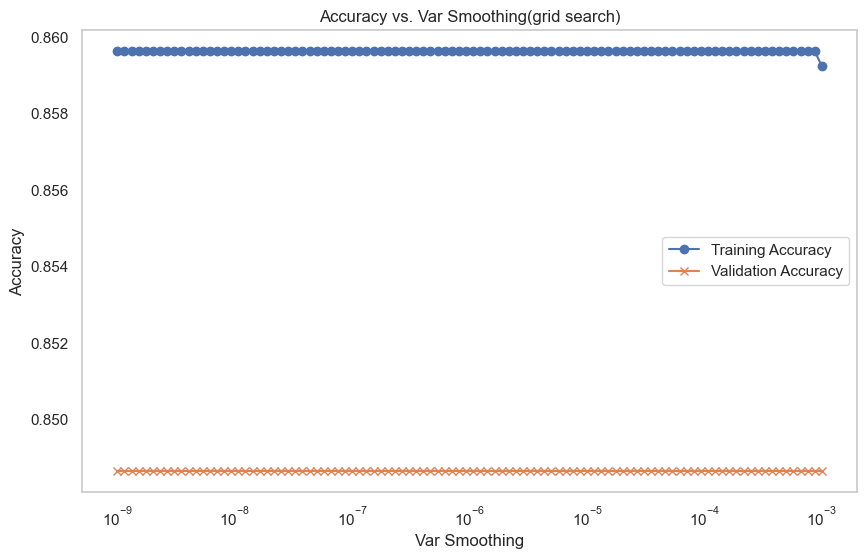

In [41]:

# Define the Naive Bayes model
nb_model = GaussianNB()

# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(-9, -3, 100)}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the results
results = grid_search.cv_results_

# Extract the best hyperparameters and accuracies
best_params = grid_search.best_params_
mean_train_scores = results['mean_train_score']  # Now this key will exist
mean_test_scores = results['mean_test_score']
param_values = results['param_var_smoothing']

# Print the best hyperparameters
print(f"Best hyperparameters: {best_params}")

# Plot training and validation

plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_train_scores, label="Training Accuracy", marker="o")
plt.plot(param_values, mean_test_scores, label="Validation Accuracy", marker="x")
plt.xscale('log')
plt.xlabel("Var Smoothing")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Var Smoothing(grid search)")
plt.legend()
plt.grid()
plt.show()
# Assuming grid_search is the GridSearchCV object
grid_results = grid_search.cv_results_



Best hyperparameters: {'var_smoothing': 1e-09}


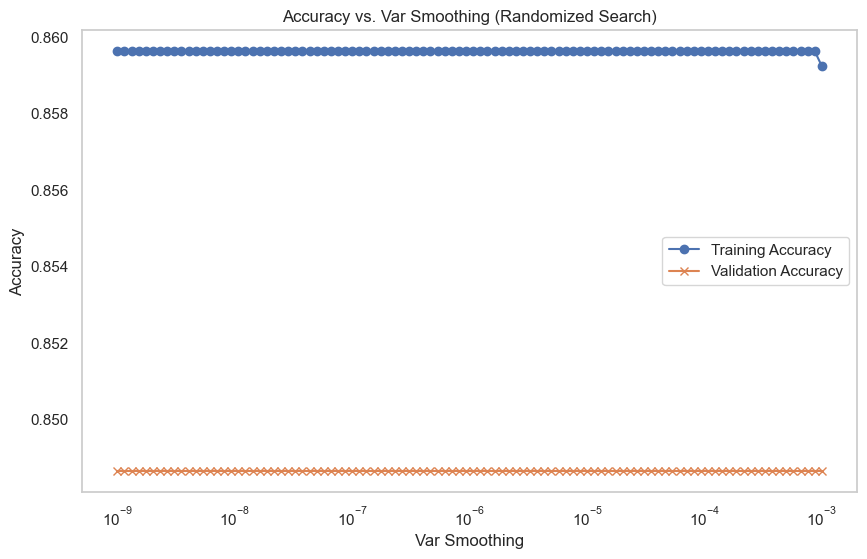

In [42]:

# Define the Naive Bayes model
nb_model = GaussianNB()

# Define the hyperparameter distribution
param_dist = {'var_smoothing': np.logspace(-9, -3, 100)}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings to sample
    cv=5,
    scoring='accuracy',
    return_train_score=True,
    random_state=42
)

random_search.fit(X_train, y_train)

# Get the results
results = random_search.cv_results_

# Extract the best hyperparameters and accuracies
best_params = random_search.best_params_
mean_train_scores = results['mean_train_score']  # Now available
mean_test_scores = results['mean_test_score']
param_values = results['param_var_smoothing']

# Print the best hyperparameters
print(f"Best hyperparameters: {best_params}")

# Plot training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_train_scores, label="Training Accuracy", marker="o")
plt.plot(param_values, mean_test_scores, label="Validation Accuracy", marker="x")
plt.xscale('log')
plt.xlabel("Var Smoothing")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Var Smoothing (Randomized Search)")
plt.legend()
plt.grid()
plt.show()


# **Compute Recall, Precision, F1-Score, and Confusion Matrix for the Naive Bayes Classifier Using Random Search**


In [43]:
best_nb_model = random_search.best_estimator_
nb_y_val_pred = best_nb_model.predict(X_val)
nb_y_test_pred = best_nb_model.predict(X_test)

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate on the validation set
print("Validation Metrics:")

# Recall, Precision, F1-Score for validation
nb_recall_val = recall_score(y_val, nb_y_val_pred, average='binary')
nb_precision_val = precision_score(y_val, nb_y_val_pred, average='binary')
nb_f1_val = f1_score(y_val, nb_y_val_pred, average='binary')

# Print validation metrics
print(f"Recall: {nb_recall_val:.2f}")
print(f"Precision: {nb_precision_val:.2f}")
print(f"F1-score: {nb_f1_val:.2f}")



# Evaluate on the test set
print("\nTest Metrics:")

# Recall, Precision, F1-Score for test
nb_recall_test = recall_score(y_test, nb_y_test_pred, average='binary')
nb_precision_test = precision_score(y_test, nb_y_test_pred, average='binary')
nb_f1_test = f1_score(y_test, nb_y_test_pred, average='binary')

# Print test metrics
print(f"Recall: {nb_recall_test:.2f}")
print(f"Precision: {nb_precision_test:.2f}")
print(f"F1-score: {nb_f1_test:.2f}")


Validation Metrics:
Recall: 0.84
Precision: 0.87
F1-score: 0.86

Test Metrics:
Recall: 0.81
Precision: 0.87
F1-score: 0.84



**Manual Tuning**

Var Smoothing Values: [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
Training Accuracies: [0.8564668769716088, 0.8564668769716088, 0.8564668769716088, 0.8564668769716088, 0.8564668769716088]
Validation Accuracies: [0.8308823529411765, 0.8308823529411765, 0.8308823529411765, 0.8308823529411765, 0.8308823529411765]


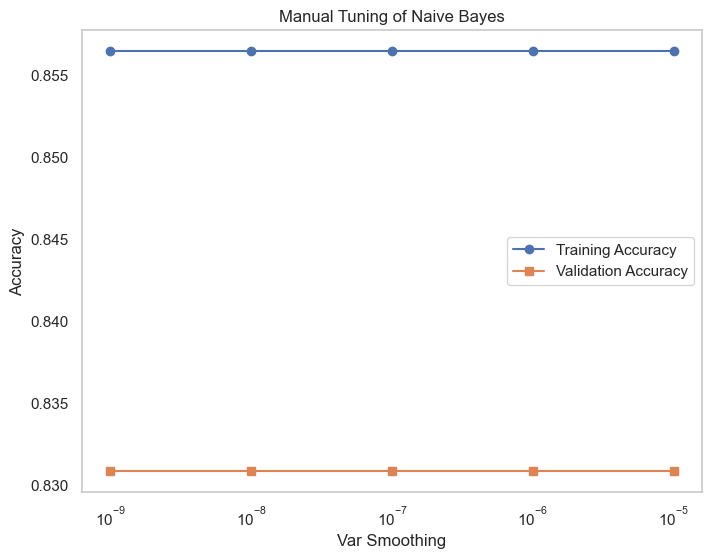

In [45]:


# Define the range of values for var_smoothing to test
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

# Initialize lists to store results
train_accuracies = []
val_accuracies = []

for var_smoothing in var_smoothing_values:
    # Create and train the model
    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train, y_train)

    # Evaluate on training data
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Evaluate on validation data
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Store results
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Print results
print("Var Smoothing Values:", var_smoothing_values)
print("Training Accuracies:", train_accuracies)
print("Validation Accuracies:", val_accuracies)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(var_smoothing_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(var_smoothing_values, val_accuracies, marker='s', label='Validation Accuracy')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Var Smoothing')
plt.ylabel('Accuracy')
plt.title('Manual Tuning of Naive Bayes')
plt.legend()
plt.grid()
plt.show()


In [46]:
print(data_no_duplicates.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


# **Training with SVM Classifier using Grid Search**

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the SVC model
SVMmodel = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Set up GridSearchCV
grid = GridSearchCV(SVMmodel, param_grid, refit=True, verbose=3, return_train_score=True)


# Fit the model
grid.fit(X_train, y_train)




Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=(train=0.878, test=0.795) total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=(train=0.848, test=0.890) total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=(train=0.874, test=0.843) total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=(train=0.862, test=0.874) total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=(train=0.858, test=0.873) total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=rbf;, score=(train=0.529, test=0.528) total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=rbf;, score=(train=0.529, test=0.528) total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=rbf;, score=(train=0.529, test=0.528) total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=rbf;, score=(train=0.529, test=0.528) total time=   0.0s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, verbose=3)

In [49]:
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)

Best parameters found:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score:  0.869116360454943


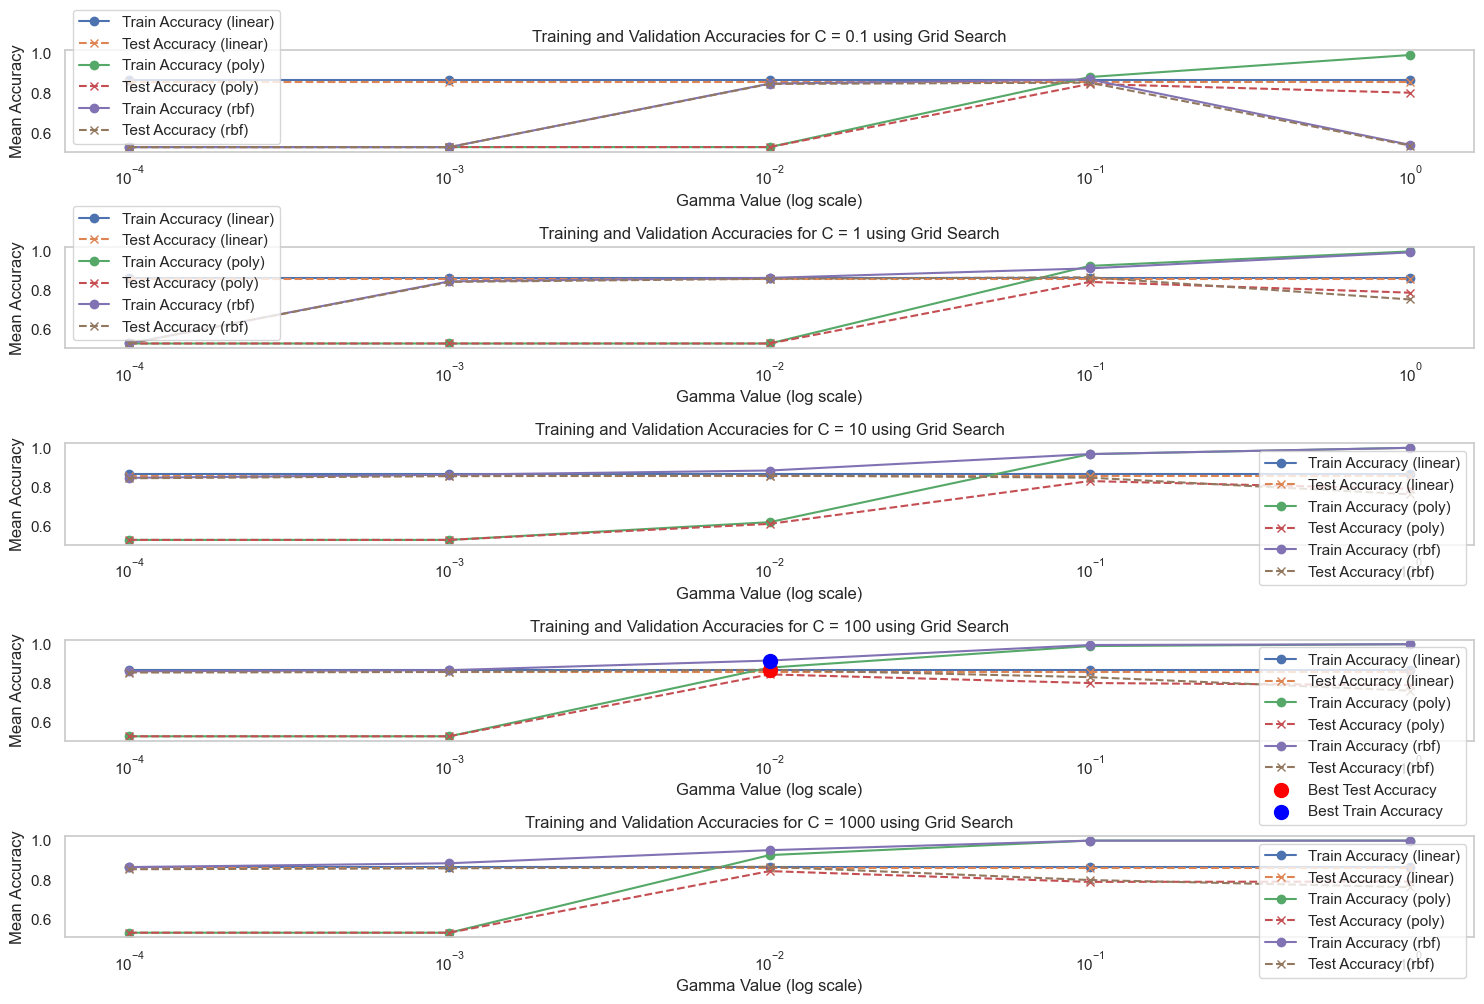

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Training Score: 0.9164049760052183
Best Test Score: 0.869116360454943


In [50]:

# Assuming you have already performed GridSearchCV and have the grid object
# Extract the necessary information from grid.cv_results_
mean_train_scores = grid.cv_results_['mean_train_score']
mean_test_scores = grid.cv_results_['mean_test_score']
param_C = grid.cv_results_['param_C']
param_gamma = grid.cv_results_['param_gamma']
param_kernel = grid.cv_results_['param_kernel']

# Convert to arrays for easier plotting
param_C = np.array(param_C)
param_gamma = np.array(param_gamma)

# Find the best parameters
best_index = grid.best_index_  # Index of the best combination
best_params = grid.best_params_  # Best parameters
best_mean_test_score = grid.cv_results_['mean_test_score'][best_index]
best_mean_train_score = grid.cv_results_['mean_train_score'][best_index]

# Create a unique combination of parameters for the plot
unique_C_values = np.unique(param_C)
unique_kernels = np.unique(param_kernel)

# Plotting
plt.figure(figsize=(15, 10))

# Loop through each value of C
for C_value in unique_C_values:
    plt.subplot(len(unique_C_values), 1, np.where(unique_C_values == C_value)[0][0] + 1)
    # Create a mask for the current C value
    mask = param_C == C_value
    for kernel in unique_kernels:
        kernel_mask = param_kernel == kernel
        combined_mask = mask & kernel_mask

        # Plot training scores
        plt.plot(param_gamma[combined_mask], mean_train_scores[combined_mask], marker='o', label=f'Train Accuracy ({kernel})', linestyle='-')
        # Plot testing scores
        plt.plot(param_gamma[combined_mask], mean_test_scores[combined_mask], marker='x', linestyle='--', label=f'Test Accuracy ({kernel})')

    # Highlight the best parameter set
    if C_value == best_params['C']:
        best_mask = (param_C == best_params['C']) & (param_gamma == best_params['gamma']) & (param_kernel == best_params['kernel'])
        plt.scatter(
            param_gamma[best_mask],
            mean_test_scores[best_mask],
            color='red',
            s=100,
            label='Best Test Accuracy',
            zorder=5
        )
        plt.scatter(
            param_gamma[best_mask],
            mean_train_scores[best_mask],
            color='blue',
            s=100,
            label='Best Train Accuracy',
            zorder=5
        )

    plt.title(f'Training and Validation Accuracies for C = {C_value} using Grid Search')
    plt.xlabel('Gamma Value (log scale)')
    plt.ylabel('Mean Accuracy')
    plt.xscale('log')  # Use a log scale for better visibility of gamma values
    plt.legend()
    plt.grid()

plt.tight_layout()  # Adjusts the subplot parameters for better spacing
plt.show()

# Display the best parameters and their scores
print(f"Best Parameters: {best_params}")
print(f"Best Training Score: {best_mean_train_score}")
print(f"Best Test Score: {best_mean_test_score}")


# **Compute Recall, Precision, F1-Score, and Confusion Matrix for the SVM Classifier Using Grid Search**


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [52]:

SVM_best_model = grid.best_estimator_
y_val_pred_SVM = SVM_best_model.predict(X_val)
y_test_pred_SVM = SVM_best_model.predict(X_test)


In [53]:



# Evaluate on the validation set
print("Validation Metrics:")

# Recall, Precision, F1-Score for validation
SVM_recall_val = recall_score(y_val, y_val_pred_SVM, average='binary')
SVM_precision_val = precision_score(y_val, y_val_pred_SVM, average='binary')
SVM_f1_val = f1_score(y_val, y_val_pred_SVM, average='binary')

# Print validation metrics
print(f"Recall: {SVM_recall_val:.2f}")
print(f"Precision: {SVM_precision_val:.2f}")
print(f"F1-score: {SVM_f1_val:.2f}")



# Evaluate on the test set
print("\nTest Metrics:")

# Recall, Precision, F1-Score for test
SVM_recall_test = recall_score(y_test, y_test_pred_SVM, average='binary')
SVM_precision_test = precision_score(y_test, y_test_pred_SVM, average='binary')
SVM_f1_test = f1_score(y_test, y_test_pred_SVM, average='binary')

# Print test metrics
print(f"Recall: {SVM_recall_test:.2f}")
print(f"Precision: {SVM_precision_test:.2f}")
print(f"F1-score: {SVM_f1_test:.2f}")


Validation Metrics:
Recall: 0.87
Precision: 0.85
F1-score: 0.86

Test Metrics:
Recall: 0.91
Precision: 0.90
F1-score: 0.91


# **Training with KNN Classifier**

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.002337      0.000428         0.008474        0.000470   
1         0.002454      0.000450         0.003075        0.000120   
2         0.002630      0.000457         0.008458        0.000465   
3         0.002400      0.000484         0.003054        0.000076   
4         0.002439      0.000442         0.008089        0.000623   
..             ...           ...              ...             ...   
315       0.001425      0.000526         0.004736        0.000745   
316       0.001753      0.000738         0.008880        0.000735   
317       0.001816      0.000732         0.005203        0.000936   
318       0.001227      0.000388         0.009830        0.001048   
319       0.001619      0.000811         0.004746        0.001221   

    param_algorithm param_leaf_size param_n_neighbors param_p param_weights  \
0              auto              20                 3       1       uniform   
1            

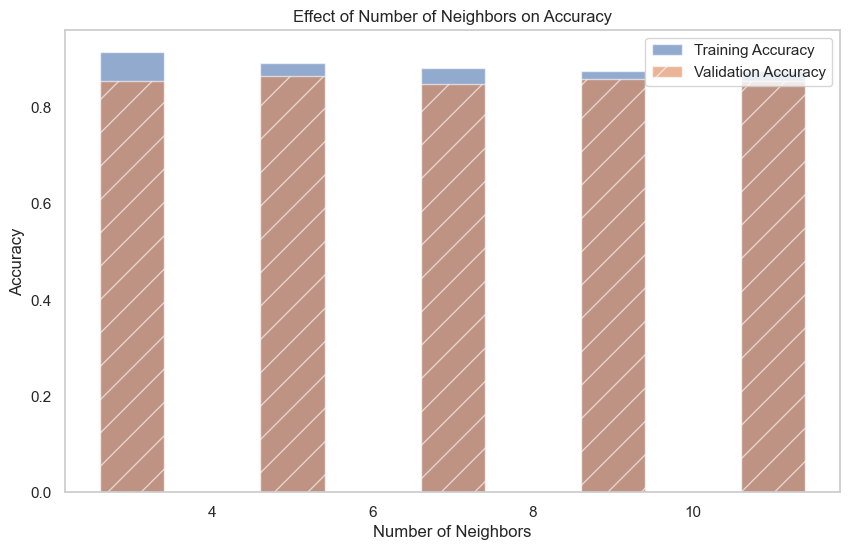

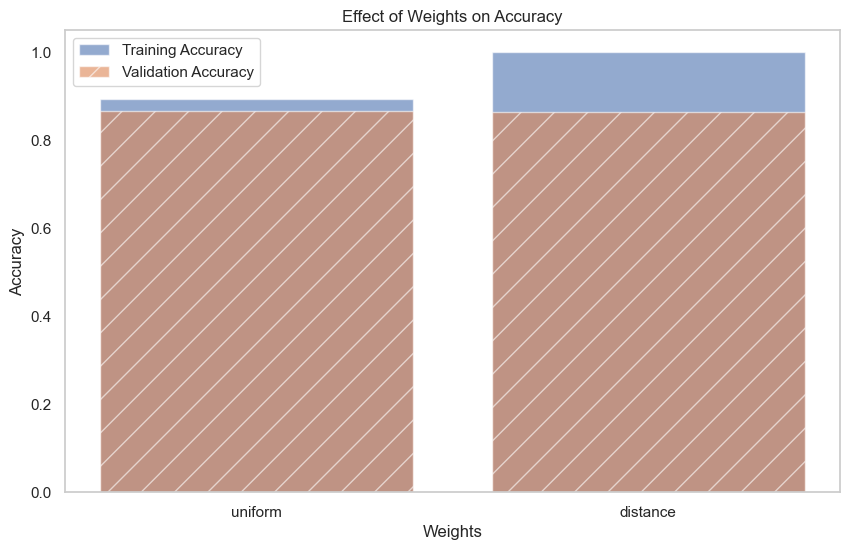

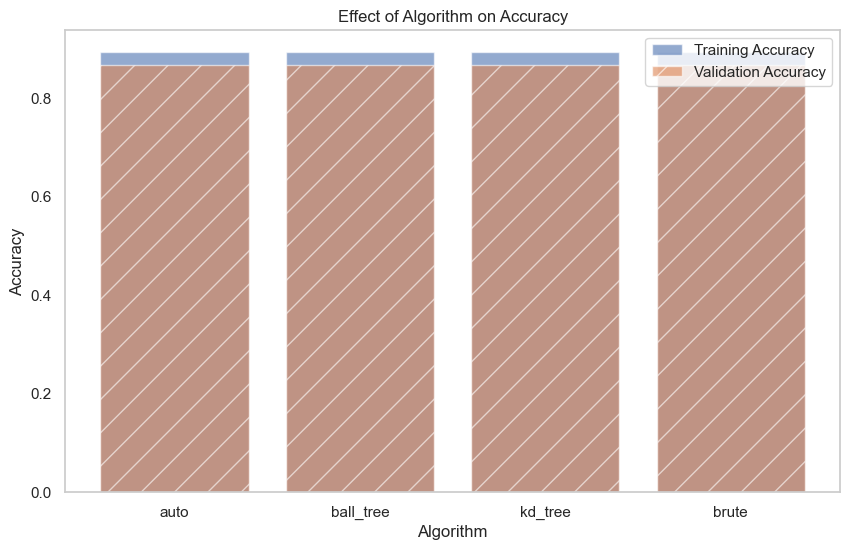

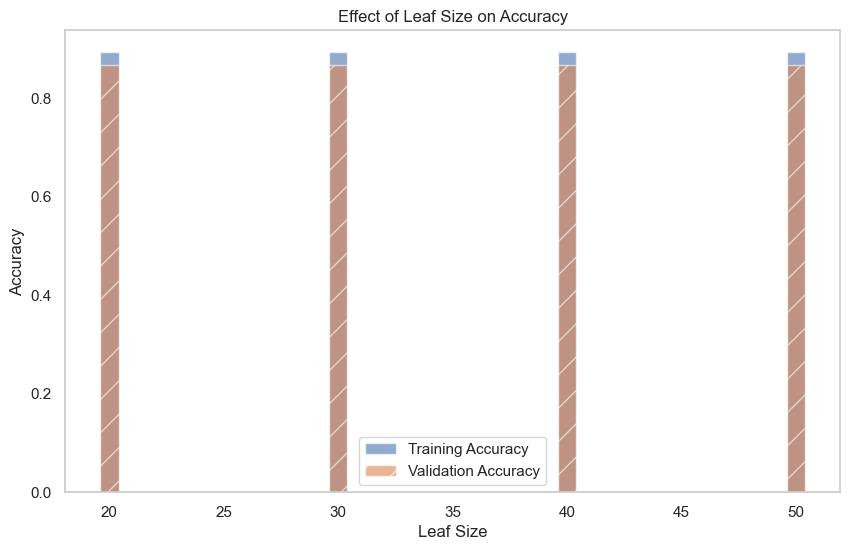

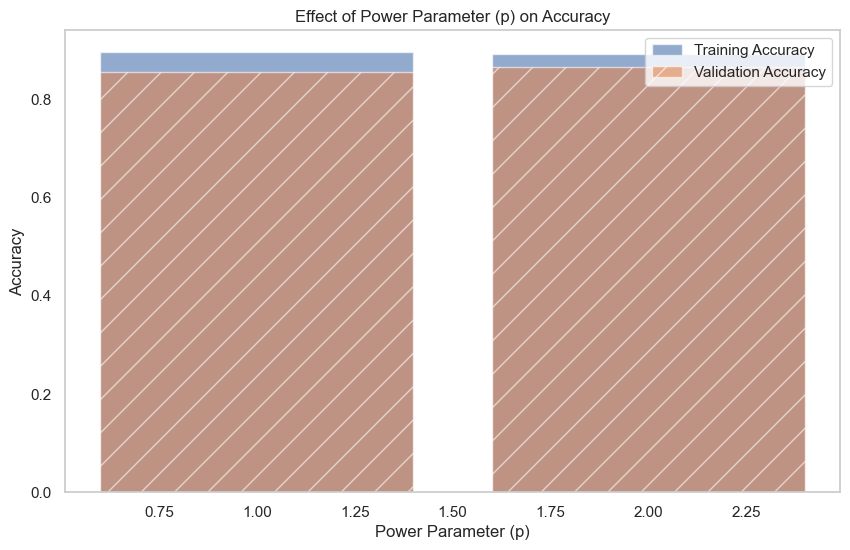

In [54]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN_Classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]
}

# Perform Grid Search
grid_search = GridSearchCV(KNN_Classifier, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Extract results
results = grid_search.cv_results_
results_df = pd.DataFrame(results)
print (results_df)
# Extract the best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# ---- Helper Function for Parameter Effect ---- #
def plot_parameter_effect(param_name, fixed_params, xlabel, title):
    # Filter results based on fixed parameters
    filtered_results = results_df
    for param, value in fixed_params.items():
        filtered_results = filtered_results[filtered_results[f'param_{param}'] == value]

    # Extract parameter values and scores
    param_values = filtered_results[f'param_{param_name}']
    mean_train_scores = filtered_results['mean_train_score']
    mean_test_scores = filtered_results['mean_test_score']

    # Plot
    plt.figure(figsize=(10, 6))
    if param_values.dtypes == 'object':  # Categorical values
        plt.bar(param_values, mean_train_scores, alpha=0.6, label="Training Accuracy")
        plt.bar(param_values, mean_test_scores, alpha=0.6, label="Validation Accuracy", hatch='/')
    else:  # Numeric values
        plt.plot(param_values, mean_train_scores, label="Training Accuracy", marker="o", linestyle='--')
        plt.plot(param_values, mean_test_scores, label="Validation Accuracy", marker="x", linestyle='-')

    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# ---- Effect of n_neighbors ---- #
plot_parameter_effect(
    param_name='n_neighbors',
    fixed_params={'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 30, 'p': 2},
    xlabel="Number of Neighbors",
    title="Effect of Number of Neighbors on Accuracy"
)

# ---- Effect of weights ---- #
plot_parameter_effect(
    param_name='weights',
    fixed_params={'n_neighbors': 5, 'algorithm': 'auto', 'leaf_size': 30, 'p': 2},
    xlabel="Weights",
    title="Effect of Weights on Accuracy"
)

# ---- Effect of algorithm ---- #
plot_parameter_effect(
    param_name='algorithm',
    fixed_params={'n_neighbors': 5, 'weights': 'uniform', 'leaf_size': 30, 'p': 2},
    xlabel="Algorithm",
    title="Effect of Algorithm on Accuracy"
)

# ---- Effect of leaf_size ---- #
plot_parameter_effect(
    param_name='leaf_size',
    fixed_params={'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'p': 2},
    xlabel="Leaf Size",
    title="Effect of Leaf Size on Accuracy"
)

# ---- Effect of p ---- #
plot_parameter_effect(
    param_name='p',
    fixed_params={'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 30},
    xlabel="Power Parameter (p)",
    title="Effect of Power Parameter (p) on Accuracy"
)

#*Compute recall, precision, F1-score, and confusion matrix for KNN Classifier*


In [55]:

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

KNN_best_model = grid_search.best_estimator_
KNN_y_val_pred = KNN_best_model.predict(X_val)
KNN_y_test_pred = KNN_best_model.predict(X_test)




# Evaluate on the validation set
print("Validation Metrics:")

# Recall, Precision, F1-Score for validation
KNN_recall_val = recall_score(y_val, KNN_y_val_pred, average='binary')
KNN_precision_val = precision_score(y_val, KNN_y_val_pred, average='binary')
KNN_f1_val = f1_score(y_val, KNN_y_val_pred, average='binary')

# Print validation metrics
print(f"Recall: {KNN_recall_val:.2f}")
print(f"Precision: {KNN_precision_val:.2f}")
print(f"F1-score: {KNN_f1_val:.2f}")

# Evaluate on the test set
print("\nTest Metrics:")

# Recall, Precision, F1-Score for test
KNN_recall_test = recall_score(y_test, KNN_y_test_pred, average='binary')
KNN_precision_test = precision_score(y_test, KNN_y_test_pred, average='binary')
KNN_f1_test = f1_score(y_test, KNN_y_test_pred, average='binary')

# Print test metrics
print(f"Recall: {KNN_recall_test:.2f}")
print(f"Precision: {KNN_precision_test:.2f}")
print(f"F1-score: {KNN_f1_test:.2f}")


Validation Metrics:
Recall: 0.84
Precision: 0.87
F1-score: 0.86

Test Metrics:
Recall: 0.93
Precision: 0.91
F1-score: 0.92


# **Decision** **Trees**

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [10, 15, 19, 25],
    'min_samples_leaf': [10, 20, 35],
    'max_leaf_nodes': [5, 6, 7],
    'max_features': ['log2', 'sqrt', None]
}

DT = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_samples_leaf': 10, 'min_samples_split': 25}


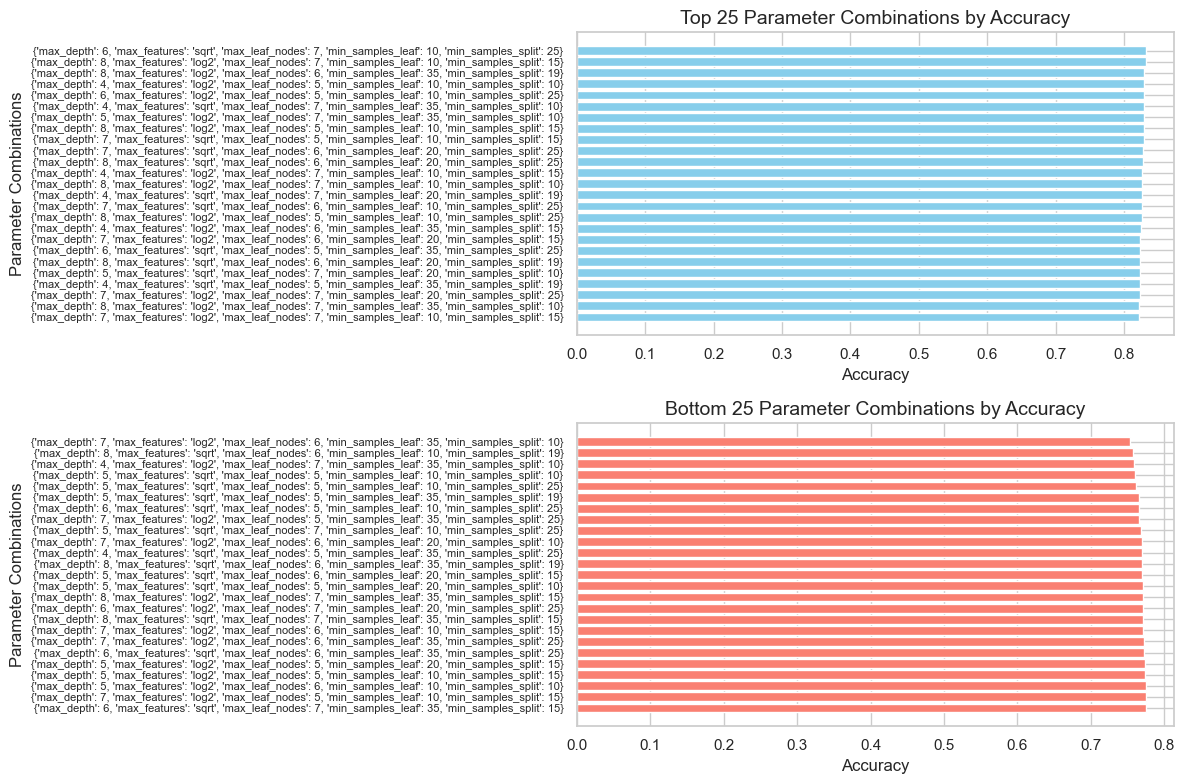

In [58]:
# Extract grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Sort by mean test score (accuracy)
top_results = results.sort_values(by="mean_test_score", ascending=False).head(25)
bottom_results = results.sort_values(by="mean_test_score", ascending=True).head(25)

# Plotting the top 25 combinations
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.barh(range(len(top_results)), top_results["mean_test_score"], color="skyblue")
plt.yticks(range(len(top_results)), top_results["params"], fontsize=8)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Parameter Combinations", fontsize=12)
plt.title("Top 25 Parameter Combinations by Accuracy", fontsize=14)
plt.gca().invert_yaxis()

# Plotting the bottom 25 combinations
plt.subplot(2, 1, 2)
plt.barh(range(len(bottom_results)), bottom_results["mean_test_score"], color="salmon")
plt.yticks(range(len(bottom_results)), bottom_results["params"], fontsize=8)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Parameter Combinations", fontsize=12)
plt.title("Bottom 25 Parameter Combinations by Accuracy", fontsize=14)
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

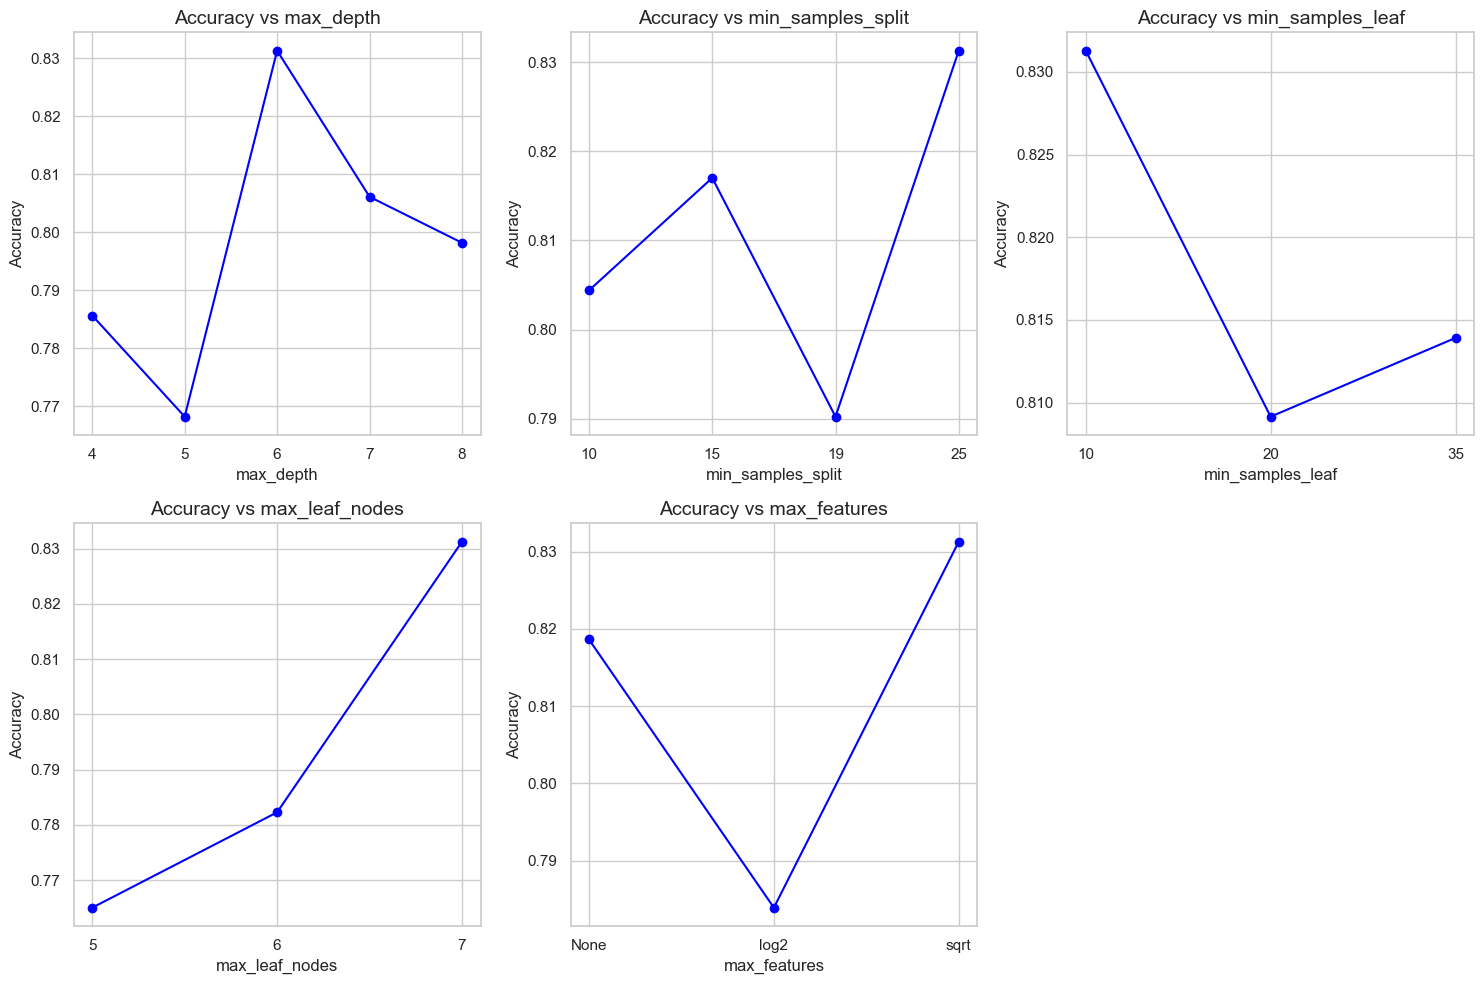

In [59]:
# Extract the best parameters
best_params = grid_search.best_params_

# Plot accuracy variation for each parameter
plt.figure(figsize=(15, 10))
param_grid_keys = list(param_grid.keys())

for i, param in enumerate(param_grid_keys, 1):
    # Extract rows where all other parameters match the best parameters
    filtered_results = results.copy()
    for p in param_grid_keys:
        if p != param:
            filtered_results = filtered_results[filtered_results['param_' + p] == best_params[p]]

    # Clean data for plotting
    filtered_results = filtered_results.dropna(subset=['mean_test_score'])
    param_values = filtered_results['param_' + param].apply(lambda x: 'None' if x is None else x).astype(str)
    accuracies = filtered_results['mean_test_score']

    # Sort values for smooth plotting
    sorted_indices = np.argsort(param_values)
    param_values = param_values.iloc[sorted_indices]
    accuracies = accuracies.iloc[sorted_indices]

    # Plot
    plt.subplot(2, 3, i)
    plt.plot(param_values, accuracies, marker='o', linestyle='-', color='blue')
    plt.xlabel(param, fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title(f'Accuracy vs {param}', fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [60]:
DT_best_model = grid_search.best_estimator_
DT_y_val_pred = DT_best_model.predict(X_val)
DT_y_test_pred = DT_best_model.predict(X_test)

In [61]:
# Evaluate on the validation set
print("Validation Metrics:")

# Recall, Precision, F1-Score for validation
DT_recall_val = recall_score(y_val, DT_y_val_pred, average='binary')
DT_precision_val = precision_score(y_val, DT_y_val_pred, average='binary')
DT_f1_val = f1_score(y_val, DT_y_val_pred, average='binary')

# Print validation metrics
print(f"Recall: {DT_recall_val:.2f}")
print(f"Precision: {DT_precision_val:.2f}")
print(f"F1-score: {DT_f1_val:.2f}")



# Evaluate on the test set
print("\nTest Metrics:")

# Recall, Precision, F1-Score for test
DT_recall_test = recall_score(y_test, DT_y_test_pred, average='binary')
DT_precision_test = precision_score(y_test, DT_y_test_pred, average='binary')
DT_f1_test = f1_score(y_test, DT_y_test_pred, average='binary')

# Print test metrics
print(f"Recall: {DT_recall_test:.2f}")
print(f"Precision: {DT_precision_test:.2f}")
print(f"F1-score: {DT_f1_test:.2f}")


Validation Metrics:
Recall: 0.76
Precision: 0.90
F1-score: 0.82

Test Metrics:
Recall: 0.79
Precision: 0.88
F1-score: 0.83


# **Histogram**

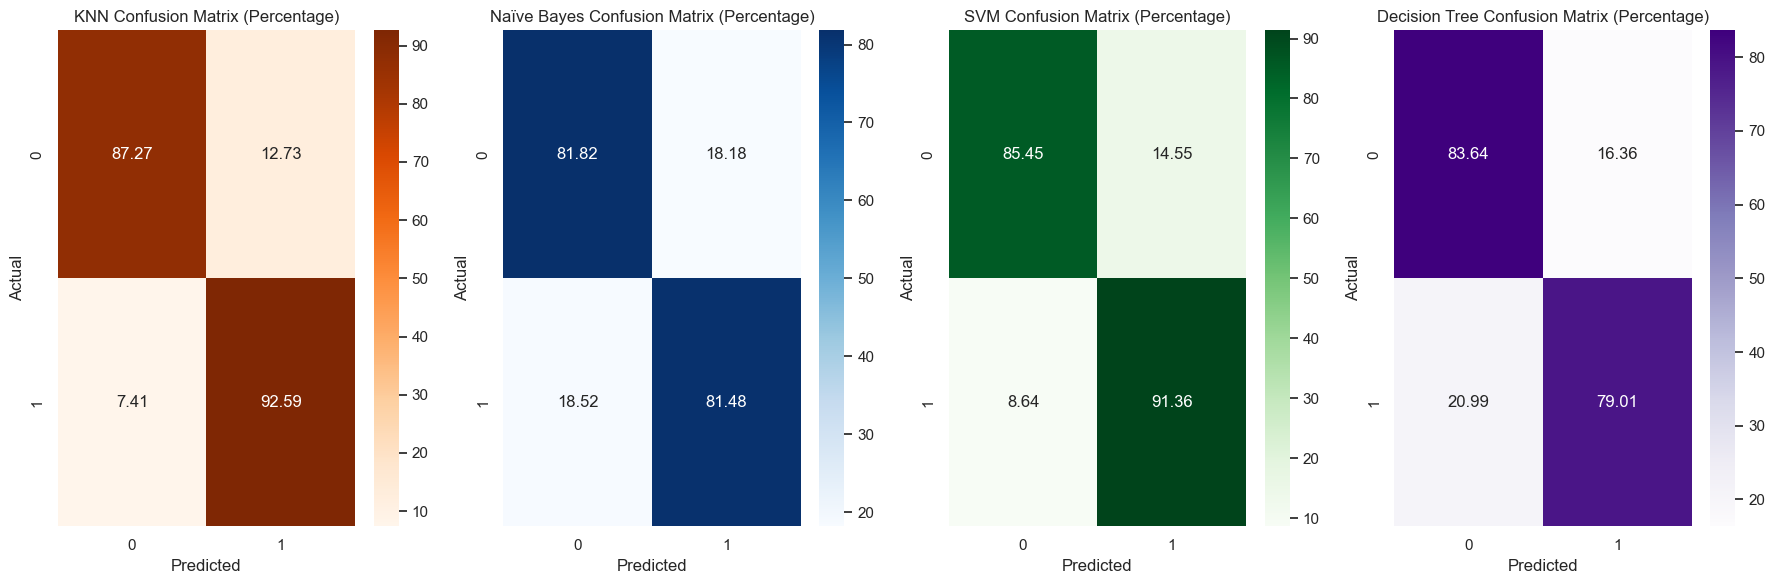

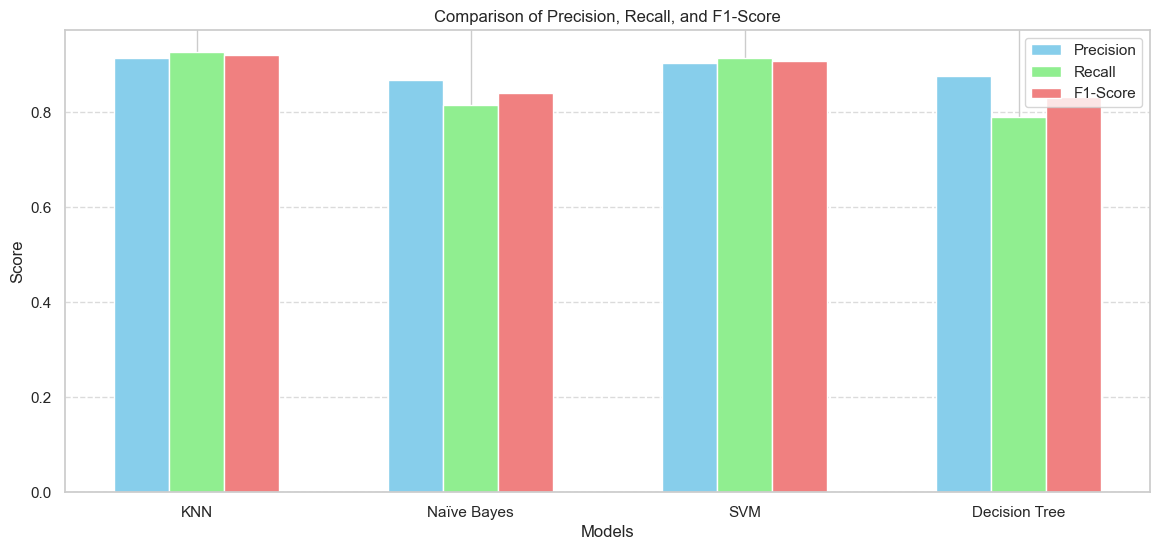

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---- Function to Convert Confusion Matrix to Percentages ---- #
def confusion_matrix_percentage(conf_matrix):
    return conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100


# ---- Evaluate Metrics ---- #
models = ["KNN", "Naïve Bayes", "SVM", "Decision Tree"]
precision = [
    KNN_precision_test,
    nb_precision_test,
    SVM_precision_test,
    DT_precision_test
]
recall = [
    KNN_recall_test,
    nb_recall_test,
    SVM_recall_test,
    DT_recall_test
]
f1 = [
    KNN_f1_test,
    nb_f1_test,
    SVM_f1_test,
    DT_f1_test
]

# ---- Confusion Matrices ---- #
knn_conf_matrix = confusion_matrix(y_test, KNN_y_test_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_y_test_pred)
svm_conf_matrix = confusion_matrix(y_test, y_test_pred_SVM)
dt_conf_matrix = confusion_matrix(y_test, DT_y_test_pred)

# ---- Convert Confusion Matrices to Percentages ---- #
knn_conf_matrix_percent = confusion_matrix_percentage(knn_conf_matrix)
nb_conf_matrix_percent = confusion_matrix_percentage(nb_conf_matrix)
svm_conf_matrix_percent = confusion_matrix_percentage(svm_conf_matrix)
dt_conf_matrix_percent = confusion_matrix_percentage(dt_conf_matrix)

# ---- Plot Confusion Matrices ---- #
plt.figure(figsize=(18, 6))

# KNN Confusion Matrix (Percentage)
plt.subplot(1, 4, 1)
sns.heatmap(knn_conf_matrix_percent, annot=True, fmt=".2f", cmap="Oranges")
plt.title("KNN Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Naïve Bayes Confusion Matrix (Percentage)
plt.subplot(1, 4, 2)
sns.heatmap(nb_conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues")
plt.title("Naïve Bayes Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# SVM Confusion Matrix (Percentage)
plt.subplot(1, 4, 3)
sns.heatmap(svm_conf_matrix_percent, annot=True, fmt=".2f", cmap="Greens")
plt.title("SVM Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Decision Tree Confusion Matrix (Percentage)
plt.subplot(1, 4, 4)
sns.heatmap(dt_conf_matrix_percent, annot=True, fmt=".2f", cmap="Purples")
plt.title("Decision Tree Confusion Matrix (Percentage)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# ---- Compare Metrics in Bar Chart ---- #
x = np.arange(len(models))  # Model indices

plt.figure(figsize=(14, 6))
plt.bar(x - 0.2, precision, width=0.2, label="Precision", color="skyblue")
plt.bar(x, recall, width=0.2, label="Recall", color="lightgreen")
plt.bar(x + 0.2, f1, width=0.2, label="F1-Score", color="lightcoral")

plt.xticks(x, models)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Comparison of Precision, Recall, and F1-Score")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# **Dendrogram Analysis**

In [63]:


from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import cut_tree


sample_data = data_no_duplicates.sample(n=100, random_state=1) 
HeartDisease_labels = sample_data['HeartDisease'].values
features_sample = sample_data.drop(columns=['HeartDisease'])






Cluster assignments
[0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1
 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1]


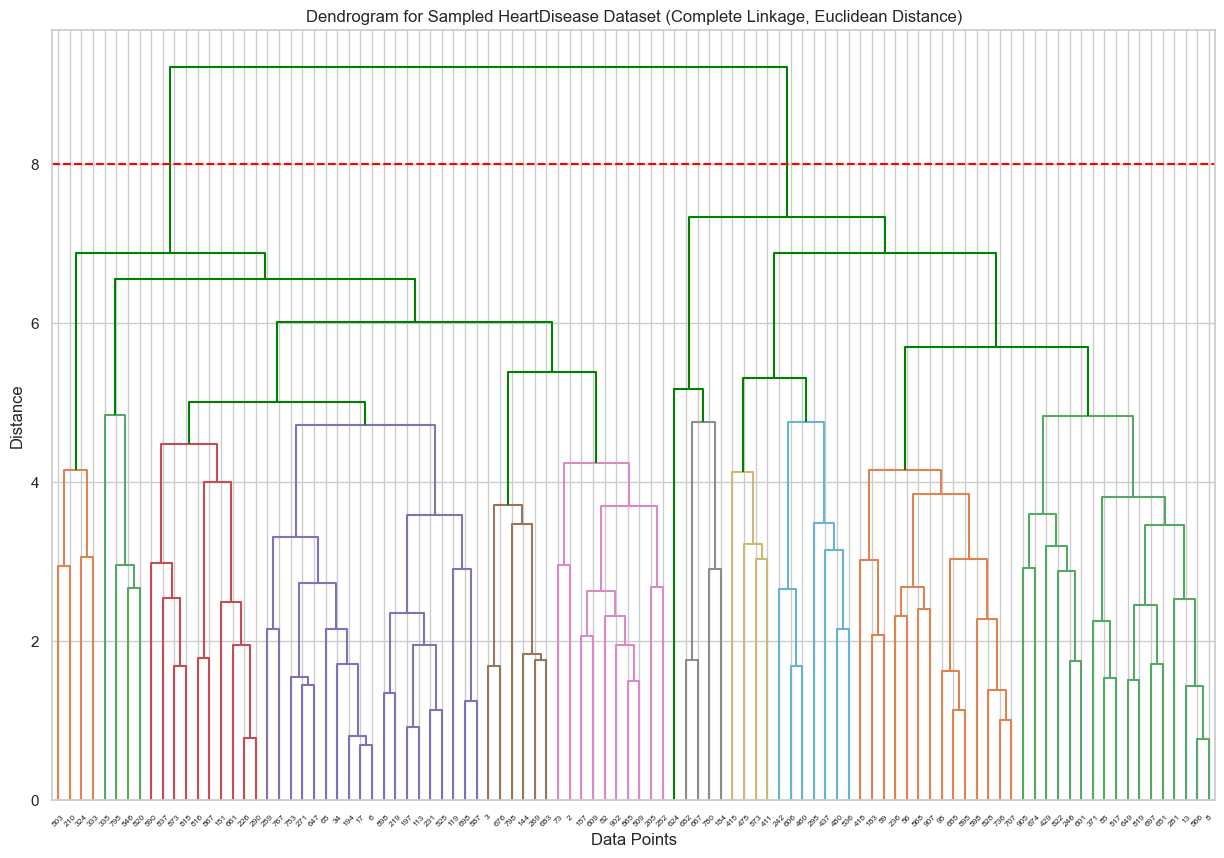

In [64]:

linkage_matrix = hierarchy.linkage(features_sample, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dn = hierarchy.dendrogram(
    linkage_matrix,
    above_threshold_color="green",
    color_threshold=5,
    leaf_rotation=45,
    leaf_font_size=6,
    labels=sample_data.index
)
clusters_CE = cut_tree(linkage_matrix, n_clusters=2).flatten()
print(f"Cluster assignments")
print(clusters_CE)
plt.axhline(y=8, color='red', linestyle='--')
plt.title("Dendrogram for Sampled HeartDisease Dataset (Complete Linkage, Euclidean Distance)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()







Cluster assignments
[0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0]


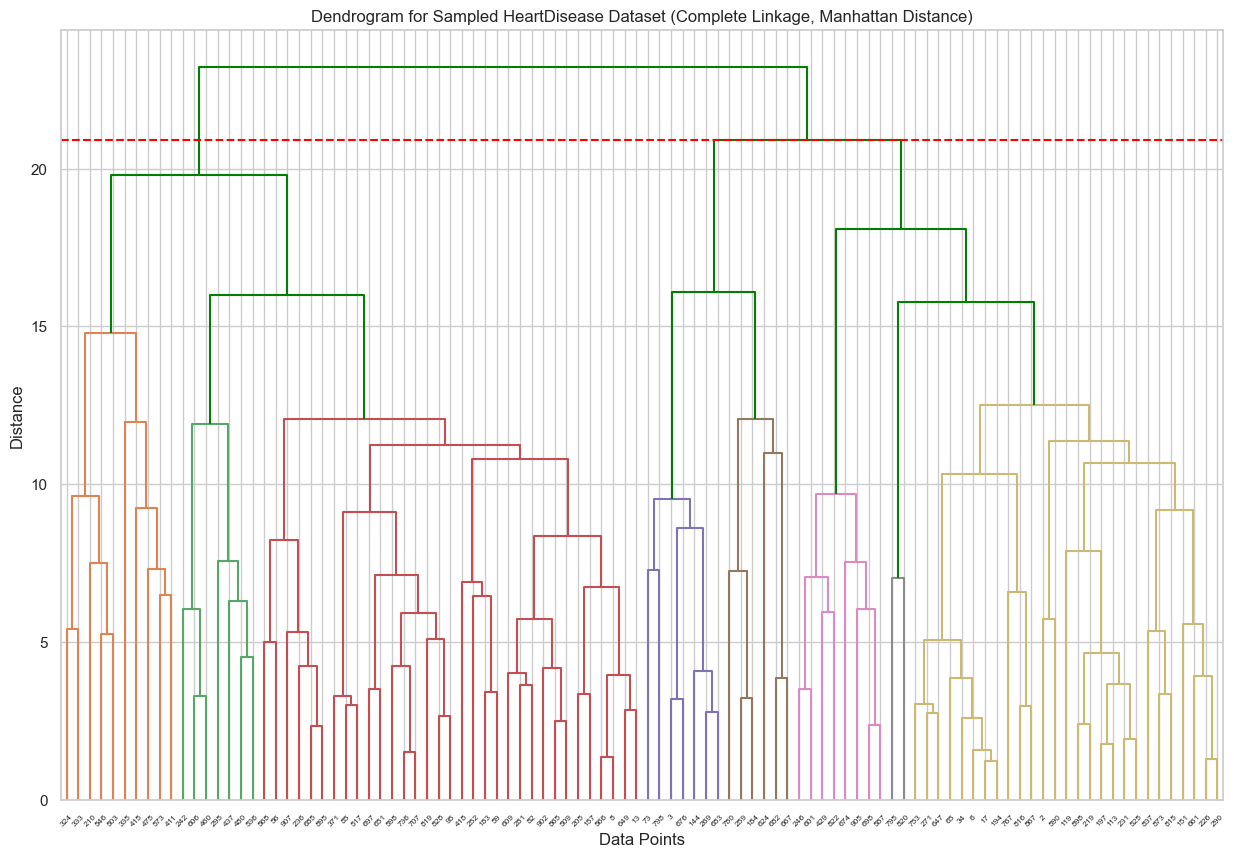

In [65]:


linkage_matrix = hierarchy.linkage(features_sample, method='complete', metric='cityblock')

# Plot the dendrogram
plt.figure(figsize=(15, 10))  
dn = hierarchy.dendrogram(
    linkage_matrix,
    above_threshold_color="green",
    color_threshold=15,  
    leaf_rotation=45,  
    leaf_font_size=6,  
    labels=sample_data.index 
)
clusters_CM = cut_tree(linkage_matrix, n_clusters=2).flatten()
print(f"Cluster assignments")
print(clusters_CM)
plt.axhline(y=20.9, color='red', linestyle='--')
plt.title("Dendrogram for Sampled HeartDisease Dataset (Complete Linkage, Manhattan Distance)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()






Cluster assignments
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


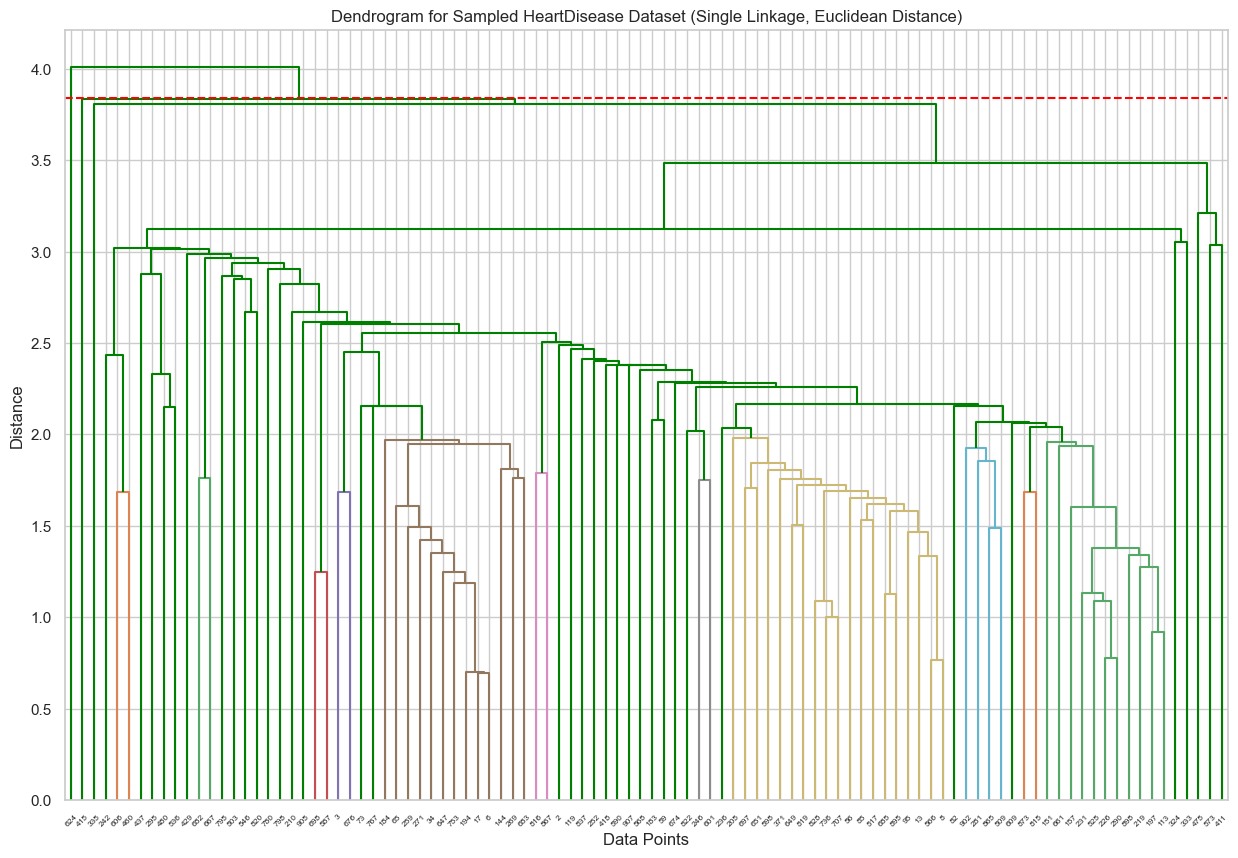

In [66]:


linkage_matrix = hierarchy.linkage(features_sample, method='single', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dn = hierarchy.dendrogram(
    linkage_matrix,
    above_threshold_color="green",
    color_threshold=2, 
    leaf_rotation=45, 
    leaf_font_size=6,  
    labels=sample_data.index  
)
clusters_SE = cut_tree(linkage_matrix, n_clusters=2).flatten()
print(f"Cluster assignments")
print(clusters_SE)
plt.axhline(y=3.84, color='red', linestyle='--')
plt.title("Dendrogram for Sampled HeartDisease Dataset (Single Linkage, Euclidean Distance)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



Cluster assignments
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


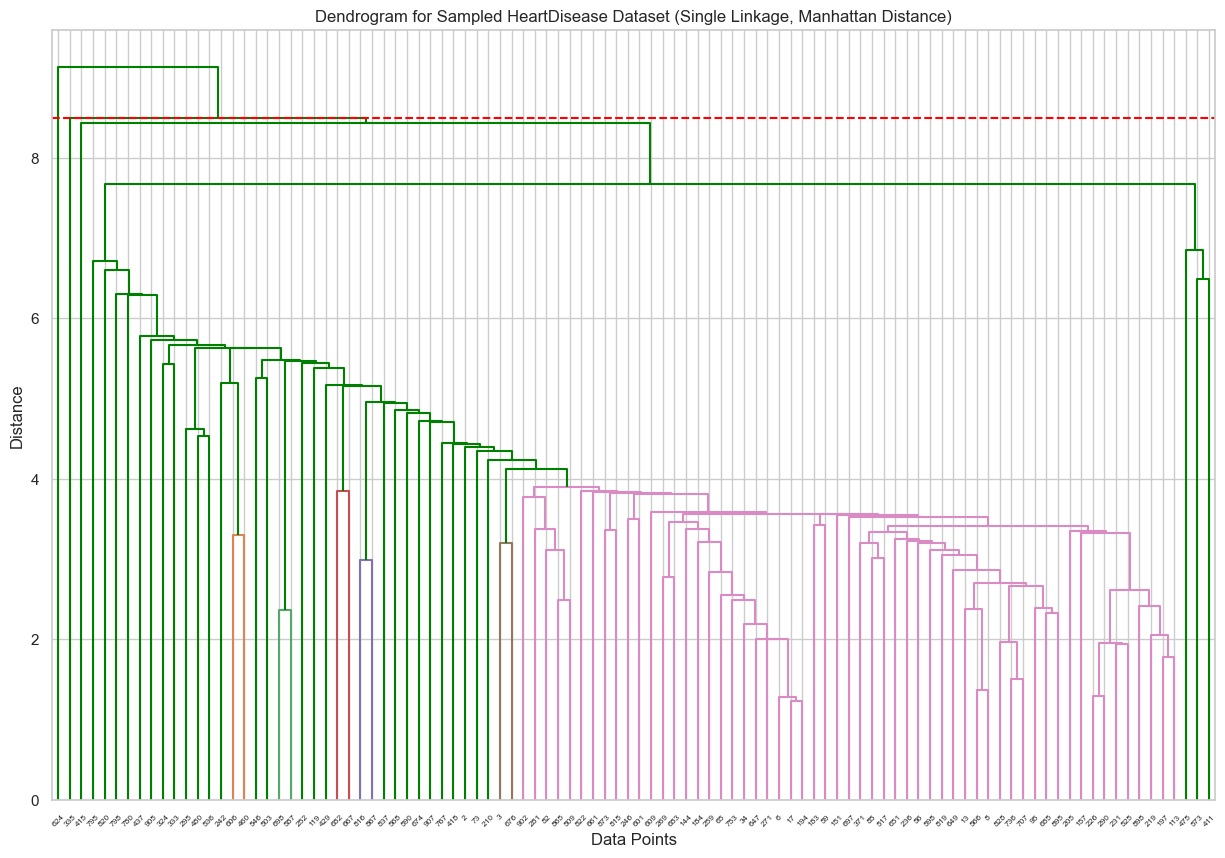

In [67]:


linkage_matrix = hierarchy.linkage(features_sample, method='single', metric='cityblock')

# Plot the dendrogram
plt.figure(figsize=(15, 10)) 
dn = hierarchy.dendrogram(
    linkage_matrix,
    above_threshold_color="green",
    color_threshold=4,
    leaf_rotation=45, 
    leaf_font_size=6,  
    labels=sample_data.index 
)
clusters_SM = cut_tree(linkage_matrix, n_clusters=2).flatten()
print(f"Cluster assignments")
print(clusters_SM)
plt.axhline(y=8.5, color='red', linestyle='--')
plt.title("Dendrogram for Sampled HeartDisease Dataset (Single Linkage, Manhattan Distance)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



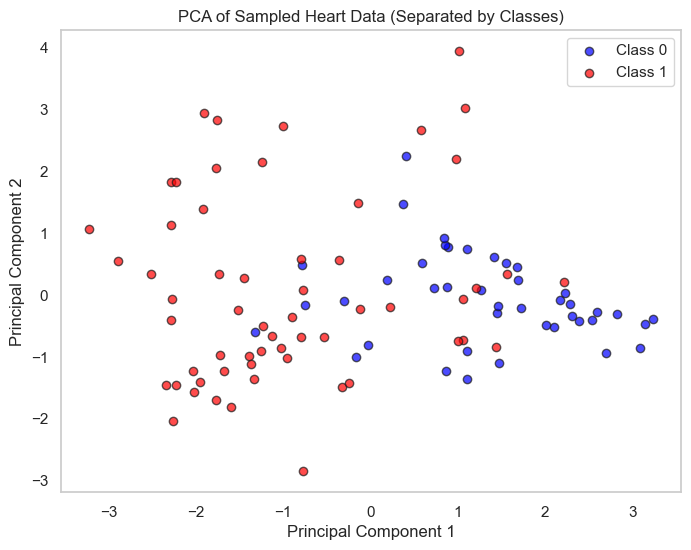

In [68]:
# PCA Transformation
pca = PCA(n_components=2)
Cluster_VS_PCA = pca.fit_transform(features_sample)
Cluster_VS_PCA_df = pd.DataFrame(Cluster_VS_PCA, columns=["PC1", "PC2"])
Cluster_VS_PCA_df["HeartDisease"] = HeartDisease_labels

plt.figure(figsize=(8, 6))


for label, color in colors.items():
    subset = Cluster_VS_PCA_df[Cluster_VS_PCA_df["HeartDisease"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], alpha=0.7, edgecolor="k", label=f"Class {label}", color=color)




plt.title("PCA of Sampled Heart Data (Separated by Classes)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

In [69]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
# Add cluster assignments to PCA DataFrame for comparison
Cluster_VS_PCA_df["Cluster_Dendrogram"] = clusters_SM

# Step 5: Calculate Silhouette Scores
silhouette_dendrogram = silhouette_score(features_sample, Cluster_VS_PCA_df["Cluster_Dendrogram"])
pca_clusters = AgglomerativeClustering(n_clusters=2).fit_predict(Cluster_VS_PCA)

silhouette_pca = silhouette_score(Cluster_VS_PCA, pca_clusters)
print(f"Silhouette Score for PCA Clusters: {silhouette_pca:.3f}")

print(f"Silhouette Score for Dendrogram Clusters: {silhouette_dendrogram:.3f}")


Silhouette Score for PCA Clusters: 0.429
Silhouette Score for Dendrogram Clusters: 0.205
